### **Required Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from google.colab import drive
from warnings import filterwarnings

filterwarnings('ignore')

### **Data Collection**

##### **Method 1: Directly Access the Kaggle Dataset using API without Manual Downloading**

In [1]:
# Download 'PlantVillage Dataset' dataset from Kaggle
# Dataset URL = https://www.kaggle.com/datasets/emmarex/plantdisease

!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
100% 658M/658M [00:17<00:00, 34.5MB/s]
100% 658M/658M [00:17<00:00, 39.6MB/s]


In [2]:
# Unzip the Dataset

!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

- Once unzip the `plantdisease.zip` file, It have a disease images of 'Pepper', 'Potato' and 'Tomato' plants.

- Next create a New Folder and renamed into 'Potato_Dataset'.

- Now only Potato Image folders drag to move from '/content/plantvillage/PlantVillage'  into  '/content/Potato_Dataset'.

Potato Dataset Directory = '/content/Potato_Dataset'

Potato Disease Image Folder Names:
- Potato___Early_blight
- Potato___Late_blight
- Potato___healthy

##### **Method 2: Manually Download the Images and Upload in Google Drive**

In [ ]:
# Mount the Google Drive in Colab to Access the Files
drive.mount('/content/drive')

Mounted at /content/drive


Potato Dataset Directory = '/content/drive/MyDrive/Dataset/PlantVillage'

Potato Disease Image Folder Names:
- Potato___Early_blight
- Potato___Late_blight
- Potato___healthy

### **Data Preprocessing**

In [ ]:
# Manually Define Parameters of Batch Size and Image Resize Pixel Values

batch_size = 32   # Total Images Split into batches and Maximum 32 Images are in Single Batch
image_size = 256  # All Images are resized into 256x256 Pixels unique size

# Creating a Image Dataset Using TensorFlow
dataset = keras.preprocessing.image_dataset_from_directory(
                                        directory='/content/drive/MyDrive/Dataset/PlantVillage',
                                        batch_size=batch_size,
                                        image_size=(image_size, image_size),
                                        shuffle=True)
dataset

Found 2948 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Target Label Class Names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Length of Batched Potato Dataset
len(dataset)

93

In [ ]:
# Maximum Number of Images Count
93 * batch_size

2976

In [ ]:
# No of images in Last Badge
32 - (2976 - 2948)

4

In [ ]:
# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 93
    train_batch_count = int(dataset_batch_count * train_size)                           # int(93*0.8) ---> 74 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(93*0.1) ---> 9 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 74 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 19 Batches ---> Next 9 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 10 Batches are Testing

    return train_ds, validation_ds, test_ds

In [ ]:
# Apply the Function in Potato Dataset
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(74, 9, 10)

(256, 256, 3)
[[[136. 121. 126.]
  [136. 121. 126.]
  [137. 122. 127.]
  ...
  [128. 114. 113.]
  [134. 120. 119.]
  [145. 131. 130.]]

 [[137. 122. 127.]
  [136. 121. 126.]
  [136. 121. 126.]
  ...
  [122. 108. 107.]
  [125. 111. 110.]
  [129. 115. 114.]]

 [[143. 128. 133.]
  [140. 125. 130.]
  [138. 123. 128.]
  ...
  [131. 117. 116.]
  [133. 119. 118.]
  [132. 118. 117.]]

 ...

 [[181. 172. 177.]
  [180. 171. 176.]
  [175. 166. 171.]
  ...
  [181. 173. 171.]
  [184. 176. 174.]
  [187. 179. 177.]]

 [[179. 170. 175.]
  [178. 169. 174.]
  [173. 164. 169.]
  ...
  [184. 176. 174.]
  [182. 174. 172.]
  [181. 173. 171.]]

 [[187. 178. 183.]
  [185. 176. 181.]
  [181. 172. 177.]
  ...
  [184. 176. 174.]
  [178. 170. 168.]
  [172. 164. 162.]]]

(32,)
1



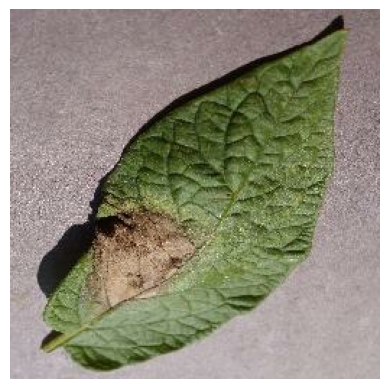

In [ ]:
# Visualize the Image and Label Batches from TensorFlow Dataset

for image_batch, label_batch in train_ds.take(1):
    print(image_batch.numpy()[0].shape)
    print(image_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    plt.imshow(image_batch.numpy()[0].astype('uint8'))
    plt.axis('off')

In [ ]:
# Overview of Training Dataset Structure and Specifications
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Overview of Training Dataset Structure and Specifications after Data Pipeline
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Build a Data Augmentation Pipeline

augmentation_pipeline = keras.Sequential([
                                keras.layers.Resizing(height=image_size, width=image_size),
                                keras.layers.Rescaling(scale=1./255),
                                keras.layers.RandomFlip(mode='horizontal_and_vertical'),
                                keras.layers.RandomRotation(factor=0.2)
                            ])
augmentation_pipeline

### **Model Building and Training**

In [ ]:
# Define the Parameters of Input_shape, Channel and Target

channel = 3  # RGB ---> Color Images
target  = 3  # len(class_names) ---> ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
input_shape = (batch_size, image_size, image_size, channel)

input_shape

(32, 256, 256, 3)

In [ ]:
# Build a CNN Model Architecture

model = keras.Sequential([

            # Preprocessing Layer
            augmentation_pipeline,

            # 1st Conv Layer
            keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # 2nd Conv Layer
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # 3rd Conv Layer
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # 4th Conv Layer
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # 5th Conv Layer
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # 6th Conv Layer
            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),

            # Flatten to 1-Dimentional Vector
            keras.layers.Flatten(),

            # Fully Connected Dense Layer
            keras.layers.Dense(units=64, activation='relu'),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])
model

In [ ]:
# Display the Model Summary

model.build(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

In [ ]:
# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=35,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/35
74/74 [==============================] - 32s 207ms/step - loss: 0.6853 - accuracy: 0.6568 - val_loss: 0.4503 - val_accuracy: 0.8160
Epoch 2/35
74/74 [==============================] - 5s 62ms/step - loss: 0.3119 - accuracy: 0.8701 - val_loss: 0.3776 - val_accuracy: 0.8368
Epoch 3/35
74/74 [==============================] - 5s 62ms/step - loss: 0.2801 - accuracy: 0.8859 - val_loss: 0.1945 - val_accuracy: 0.9271
Epoch 4/35
74/74 [==============================] - 4s 60ms/step - loss: 0.2071 - accuracy: 0.9269 - val_loss: 0.1887 - val_accuracy: 0.9236
Epoch 5/35
74/74 [==============================] - 5s 62ms/step - loss: 0.2029 - accuracy: 0.9218 - val_loss: 0.2195 - val_accuracy: 0.9132
Epoch 6/35
74/74 [==============================] - 4s 60ms/step - loss: 0.1156 - accuracy: 0.9632 - val_loss: 0.1297 - val_accuracy: 0.9479
Epoch 7/35
74/74 [==============================] - 4s 59ms/step - loss: 0.0969 - accuracy: 0.9641 - val_loss: 0.1352 - val_accuracy: 0.9479
Epoch 8/35


In [ ]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

10/10 [==============================] - 10s 27ms/step - loss: 0.0335 - accuracy: 0.9937


[0.03347916528582573, 0.9937499761581421]

In [ ]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 35, 'steps': 74}

In [ ]:
# Accessing Keys of Training History
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc[0:5]

[0.6568375825881958,
 0.8700854778289795,
 0.8858974575996399,
 0.9269230961799622,
 0.9217948913574219]

In [ ]:
len(acc), len(val_acc), len(loss), len(val_loss)

(35, 35, 35, 35)

In [ ]:
# Save the Model
model.save('/content/model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

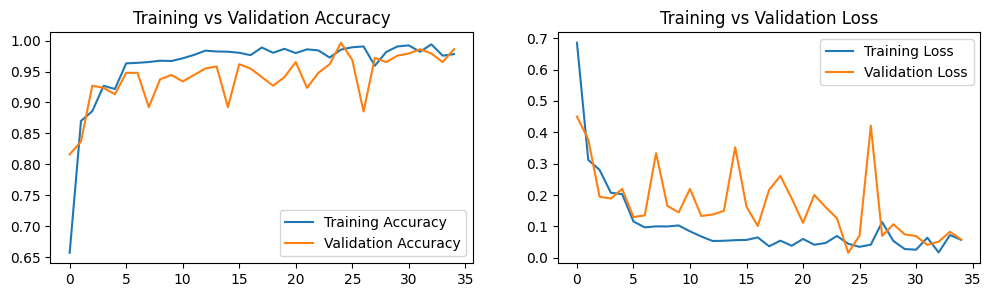

In [ ]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

### **Model Inference**

In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
def prediction(image_path, class_names = dataset.class_names):

    # Read and Resize the Image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))

    # Read and Resize the Image using Pillow
    # img = Image.open(image_path).resize((image_size,image_size))

    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Converting Image to Array using TensorFlow
    img_array = np.expand_dims(img_array, axis=0)               # Expanding Image Array to Include Batch Dimension: (256, 256, 3) to (1, 256, 256, 3)

    model = tf.keras.models.load_model('/content/model.h5')     # Load the Trained TensorFlow Model
    prediction = model.predict(img_array)                       # Predict the Index of Class_Label

    predicted_class = class_names[np.argmax(prediction)]        # Find out the Class_Label_Name from Prediction_Dict (Using Max Probability Index)
    confidence = round(np.max(prediction)*100, 2)               # Calculate the Model Confidence

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')
    print('')
    plt.imshow(img)
    plt.axis('off')


1/1 [==============================] - 0s 473ms/step
Predicted Class : Potato___Early_blight
Confident : 100.0%



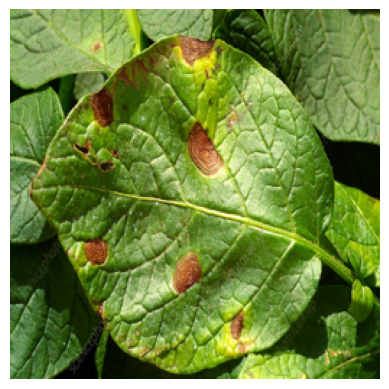

In [ ]:
prediction(image_path = '/content/potato_early_blight.jpg')

1/1 [==============================] - 0s 96ms/step
Predicted Class : Potato___Late_blight
Confident : 93.74%



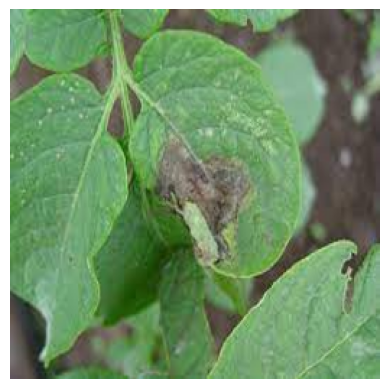

In [ ]:
prediction(image_path = '/content/potato_late_blight.jpg')

1/1 [==============================] - 0s 101ms/step
Predicted Class : Potato___healthy
Confident : 99.94%



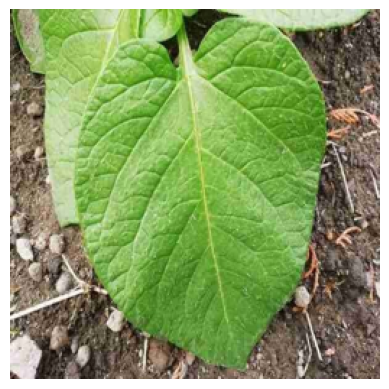

In [ ]:
prediction(image_path = '/content/potato_healthy.jpg')